In [3]:
from pathlib import Path

import torch
from timesformer.models.vit import TimeSformer

In [2]:
model_file = Path('/workspaces/TimeSFormer/checkpoints/checkpoint_epoch_00265.pyth')
model_file.exists()

True

In [3]:
import pandas as pd
df = pd.read_csv("/workspaces/timesformer/TimeSformer/timesformer/datasets/kinetics-dataset/k700-2020_targz/annotations/train.csv")
df = df[df['label'] == 'abseiling']

vide_base_path = Path('/workspaces/timesformer/TimeSformer/timesformer/datasets/kinetics-dataset/k700-2020_targz/train/abseiling')


In [4]:
import os
import cv2
import pandas as pd

def sample_frames_uniformly(video_path, output_dir, num_frames=8, resize_dim=224):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Unable to open video file")
        return
    
    # Get total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Calculate the indices to uniformly sample frames
    sample_indices = [int(i * (total_frames - 1) / (num_frames - 1)) for i in range(num_frames)]
    
    # List to store sampled frames
    sampled_frames = []
    
    # Loop through frames and sample
    for index in sample_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, index)
        ret, frame = cap.read()
        if ret:
            # Resize frame
            resized_frame = cv2.resize(frame, (resize_dim, resize_dim))
            sampled_frames.append(resized_frame)
    
    # Release video capture
    cap.release()
    
    return sampled_frames


# Path to directory containing videos
video_dir = "/workspaces/timesformer/TimeSformer/timesformer/datasets/kinetics-dataset/k700-2020_targz/train/abseiling"


# Iterate over files in the video directory
for filename in os.listdir(video_dir)[0:10]:
    if filename.endswith(".mp4"):
        video_path = os.path.join(video_dir, filename)
        
        # Sample frames from the video
        sampled_frames = sample_frames_uniformly(video_path, "sampled_frames")
        
        # Create a directory for the sampled frames
        output_dir = os.path.join("sampled_frames", os.path.splitext(filename)[0])
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        # Save sampled frames
        for i, frame in enumerate(sampled_frames):
            output_path = os.path.join(output_dir, f"frame_{i}.jpg")
            cv2.imwrite(output_path, frame)
        
        print(f"Sampled frames saved for video: {filename}")

Sampled frames saved for video: -3B32lodo2M_000059_000069.mp4
Sampled frames saved for video: -7kbO0v4hag_000107_000117.mp4
Sampled frames saved for video: -bwYZwnwb8E_000013_000023.mp4
Sampled frames saved for video: -Cv3NwxG_8g_000087_000097.mp4
Sampled frames saved for video: -hLv_HL6UhY_000151_000161.mp4
Sampled frames saved for video: -hwUQqFadvE_000048_000058.mp4
Sampled frames saved for video: -j9C-auQoKs_000207_000217.mp4
Sampled frames saved for video: -JNfr9HZc5w_000113_000123.mp4
Sampled frames saved for video: -o4X5Z_Isyc_000085_000095.mp4
Sampled frames saved for video: -Qhiiw9yJvc_000825_000835.mp4


In [ ]:
data_path = "/workspaces/timesformer/TimeSformer/sampled_frames"

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [83]:
model_file = Path('/workspaces/TimeSFormer/checkpoints/checkpoint_epoch_00260.pyth')
print(model_file.exists())

number_of_frames_timesformer = 8
model = TimeSformer(img_size=224, num_classes=4, num_frames=number_of_frames_timesformer, attention_type='divided_space_time',  pretrained_model=str(model_file))
model.to(device)
model.eval()

True


TimeSformer(
  (model): VisionTransformer(
    (dropout): Dropout(p=0.0, inplace=False)
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (time_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
          (attn_drop): Dropout(p=0.0, inplace=False)
        )
        (temporal_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (temporal_attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
   

In [65]:
import json
import os
from iopath import PathManager

path_to_label_json = Path("/workspaces/TimeSFormer/timesformer/datasets/hslu/label_files.json")
path_to_label_json.exists()

path_to_test_json = Path("/workspaces/TimeSFormer/timesformer/datasets/hslu/annotations_test.json")
path_to_test_json.exists()


base_path = Path("/workspaces/TimeSFormer/timesformer/datasets/hslu")

with open(path_to_test_json, 'r') as file:
    data = json.load(file)
with open(path_to_label_json, 'r') as file:
    labels = json.load(file)
data['Data'][0]['id']

labels[str(0)]

'Front to Back'

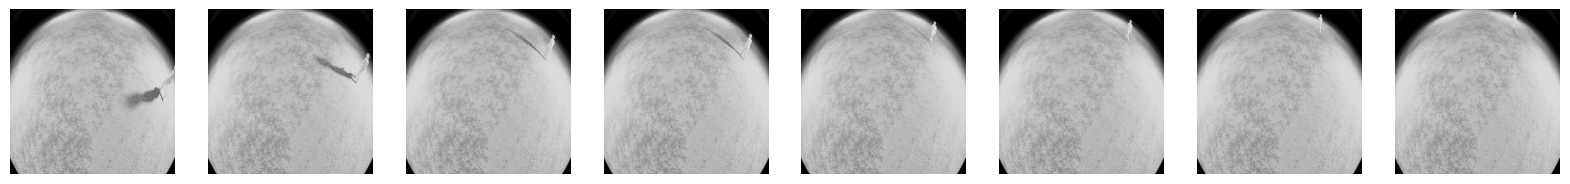

TypeError: expected str, bytes or os.PathLike object, not int

In [76]:
import glob 
import numpy as np
import random

from timesformer.datasets import utils
import matplotlib.pyplot as plt

mean_vec = [0.45, 0.45, 0.45]
std_vec = [0.225, 0.225, 0.225]

def get_frame(id):
    path_to_video_frames = base_path.joinpath(id)
    entire_video_frames = glob.glob(os.path.join(path_to_video_frames, 'image_*.png'))

    num_frames = number_of_frames_timesformer
    video_length = len(entire_video_frames)


    seg_size = float(video_length - 1) / num_frames
    seq = []
    for i in range(num_frames):
        start = int(np.round(seg_size * i))
        end = int(np.round(seg_size * (i + 1)))
        seq.append(random.randint(start, end))

    frames = torch.as_tensor(
        utils.retry_load_images(
            [entire_video_frames[frame] for frame in seq],
            1,
        )
    )

    frames = utils.tensor_normalize(
        frames, mean_vec, std_vec
    )
    frames = frames.permute(3, 0, 1, 2)
    frames = utils.simple_scale(frames,224)
    return frames

get_frame(data['Data'][0]['id']).shape


def denormalize(tensor, mean, std):
    """
    De-normalize a tensor using the given mean and standard deviation.
    Args:
        tensor (torch.Tensor): The normalized tensor.
        mean (list): The mean vector used for normalization.
        std (list): The standard deviation vector used for normalization.
    Returns:
        torch.Tensor: The de-normalized tensor.
    """
    mean = torch.tensor(mean).view(1, 3, 1, 1)
    std = torch.tensor(std).view(1, 3, 1, 1)
    tensor = tensor * std + mean
    return tensor

def plot_images(tensor, mean, std):
    """
    Plot images stored in a tensor of shape [3, 8, 224, 224].
    Args:
        tensor (torch.Tensor): The tensor containing images.
        mean (list): The mean vector used for normalization.
        std (list): The standard deviation vector used for normalization.
    """
    # Ensure the tensor has the correct shape
    if tensor.shape != (3, 8, 224, 224):
        raise ValueError("Expected tensor shape to be [3, 8, 224, 224]")

    tensor = tensor.permute(1, 0, 2, 3)  # shape becomes [8, 3, 224, 224]

    # De-normalize the tensor
    tensor = denormalize(tensor, mean, std)

    # Permute the tensor to get images in the correct format for plotting

    # Create a figure to plot the images
    fig, axes = plt.subplots(1, 8, figsize=(20, 5))

    # Plot each image
    for i in range(8):
        image = tensor[i].numpy().transpose(1, 2, 0)  # Convert to HWC format
        axes[i].imshow(image)
        axes[i].axis('off')  # Hide the axes

    plt.show()
plot_images(get_frame(data['Data'][0]['id']),mean_vec,std_vec)
print(labels[str(get_frame(data['Data'][0]['label']))])

In [84]:
correct_predictions = 0
total_samples = len( data['Data'])
for data_entry in data['Data']:
    id = data_entry['id']
    label = data_entry['label']

    # plot_images(get_frame(id),mean_vec,std_vec)
    frame_for_inference = get_frame(id)
    pred = model(frame_for_inference.unsqueeze(0).to(device),)
    print('predicted: '+labels[str(pred.argmax().item())])
    print('Ground T.: '+labels[str(label)])

    if pred.argmax().item() == label:
        correct_predictions += 1
accuracy = correct_predictions / total_samples
print('Accuracy : ',accuracy)

predicted: Left To Right
Ground T.: Back To Front
predicted: Right To Left
Ground T.: Left To Right
predicted: Back To Front
Ground T.: Front to Back
predicted: Left To Right
Ground T.: Back To Front
predicted: Back To Front
Ground T.: Front to Back
predicted: Front to Back
Ground T.: Front to Back
predicted: Left To Right
Ground T.: Front to Back
predicted: Right To Left
Ground T.: Front to Back
predicted: Left To Right
Ground T.: Right To Left
predicted: Front to Back
Ground T.: Front to Back
predicted: Back To Front
Ground T.: Left To Right
predicted: Left To Right
Ground T.: Right To Left
predicted: Back To Front
Ground T.: Back To Front
predicted: Left To Right
Ground T.: Right To Left
predicted: Right To Left
Ground T.: Left To Right
predicted: Right To Left
Ground T.: Left To Right
predicted: Right To Left
Ground T.: Left To Right
predicted: Back To Front
Ground T.: Back To Front
predicted: Left To Right
Ground T.: Right To Left
predicted: Left To Right
Ground T.: Right To Left


In [82]:
att_roll = DividedAttentionRollout(model)
# masks = att_roll(path_to_video)

att_roll(get_frame(id))

ValueError: not enough values to unpack (expected 5, got 4)

In [11]:
import cv2
import os
import torchvision.transforms as transforms

path_to_videos = ['/workspaces/timesformer/TimeSformer/sampled_frames/SpreadClose',
                  '/workspaces/timesformer/TimeSformer/sampled_frames/SpreadFar']

sampled_videos = []

for path in path_to_videos:
    video_frames = []
    for filename in os.listdir(path):
        if filename.endswith(".png"):
            frame_path = os.path.join(path, filename)
            
            # Read frame as a numpy array
            frame = cv2.imread(frame_path)

            frame = cv2.resize(frame,(224,244))
            
            # Convert BGR to RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Append frame to video frames
            video_frames.append(frame)
    sampled_videos.append(torch.stack([transforms.ToTensor()(frame) for frame in video_frames]))
dummy_video = torch.stack(sampled_videos)
dummy_video = dummy_video.permute(0, 2, 1,3, 4)

In [12]:
dummy_video.shape

torch.Size([2, 3, 8, 244, 224])

In [13]:
#dummy_video = torch.randn(2, 3, 8, 224, 224) # (batch x channels x frames x height x width)
pred = model(dummy_video.to(device),) # (2, 600)
# assert pred.shape == (2,600)

In [81]:
from pathlib import Path
from timesformer.models.vit import *
from timesformer.datasets import utils as utils
from timesformer.config.defaults import get_cfg
import torch
import torchvision.transforms as transforms
from PIL import Image
import json
import matplotlib.pyplot as plt
from einops import rearrange, repeat, reduce
import cv2

DEFAULT_MEAN = [0.45, 0.45, 0.45]
DEFAULT_STD = [0.225, 0.225, 0.225]
# convert video path to input tensor for model
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(DEFAULT_MEAN,DEFAULT_STD),
    transforms.Resize(224),
    transforms.CenterCrop(224),
])

# convert the video path to input for cv2_imshow()
transform_plot = transforms.Compose([
    lambda p: cv2.imread(str(p),cv2.IMREAD_COLOR),
    transforms.ToTensor(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    lambda x: rearrange(x*255, 'c h w -> h w c').numpy()
])


def get_frames(path_to_video, num_frames=8):
  "return a list of paths to the frames of sampled from the video"
  path_to_frames = list(path_to_video.iterdir())
  path_to_frames.sort(key=lambda f: int(f.with_suffix('').name[-6:]))
  assert num_frames <= len(path_to_frames), "num_frames can't exceed the number of frames extracted from videos"
  if len(path_to_frames) == num_frames:
    return(path_to_frames)
  else:
    video_length = len(path_to_frames)
    seg_size = float(video_length - 1) / num_frames 
    seq = []
    for i in range(num_frames):
      start = int(np.round(seg_size * i))
      end = int(np.round(seg_size * (i + 1)))
      seq.append((start + end) // 2)
      path_to_frames_new = [path_to_frames[p] for p in seq]
    return(path_to_frames_new)

def create_video_input(path_to_video):
  "create the input tensor for TimeSformer model"
  path_to_frames = get_frames(path_to_video)
  frames = [transform(cv2.imread(str(p), cv2.IMREAD_COLOR)) for p in path_to_frames]
  frames = torch.stack(frames, dim=0)
  frames = rearrange(frames, 't c h w -> c t h w')
  frames = frames.unsqueeze(dim=0)
  return(frames)

def show_mask_on_image(img, mask):
    img = np.float32(img) / 255
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)


def create_masks(masks_in, np_imgs):
  masks = []
  for mask, img in zip(masks_in, np_imgs):
    mask= cv2.resize(mask, (img.shape[1], img.shape[0]))
    mask = show_mask_on_image(img, mask)
    masks.append(mask)
  return(masks)

# export
def combine_divided_attention(attn_t, attn_s):
  ## time attention
    # average time attention weights across heads
  attn_t = attn_t.mean(dim = 1)
    # add cls_token to attn_t as an identity matrix since it only attends to itself 
  I = torch.eye(attn_t.size(-1)).unsqueeze(0)
  attn_t = torch.cat([I,attn_t], 0)
    # adding identity matrix to account for skipped connection 
  attn_t = attn_t +  torch.eye(attn_t.size(-1))[None,...]
    # renormalize
  attn_t = attn_t / attn_t.sum(-1)[...,None]

  ## space attention
   # average across heads
  attn_s = attn_s.mean(dim = 1)
   # adding residual and renormalize 
  attn_s = attn_s +  torch.eye(attn_s.size(-1))[None,...]
  attn_s = attn_s / attn_s.sum(-1)[...,None]
  
  ## combine the space and time attention
  attn_ts = einsum('tpk, ktq -> ptkq', attn_s, attn_t)
  
  ## average the cls_token attention across the frames
   # splice out the attention for cls_token
  attn_cls = attn_ts[0,:,:,:]
   # average the cls_token attention and repeat across the frames
  attn_cls_a = attn_cls.mean(dim=0)
  attn_cls_a = repeat(attn_cls_a, 'p t -> j p t', j = 8)
   # add it back
  attn_ts = torch.cat([attn_cls_a.unsqueeze(0),attn_ts[1:,:,:,:]],0)
  return(attn_ts)

class DividedAttentionRollout():
  def __init__(self, model, **kwargs):
    self.model = model
    self.hooks = []

  def get_attn_t(self, module, input, output):
    self.time_attentions.append(output.detach().cpu())
  def get_attn_s(self, module, input, output):
    self.space_attentions.append(output.detach().cpu())

  def remove_hooks(self): 
    for h in self.hooks: h.remove()
    
  def __call__(self, input_tensor):
    # input_tensor = create_video_input(path_to_video)
    self.model.zero_grad()
    self.time_attentions = []
    self.space_attentions = []
    self.attentions = []
    for name, m in self.model.named_modules():
      if 'temporal_attn.attn_drop' in name:
        self.hooks.append(m.register_forward_hook(self.get_attn_t))
      elif 'attn.attn_drop' in name:
        self.hooks.append(m.register_forward_hook(self.get_attn_s))
    preds = self.model(input_tensor)
    for h in self.hooks: h.remove()
    for attn_t,attn_s in zip(self.time_attentions, self.space_attentions):
      self.attentions.append(combine_divided_attention(attn_t,attn_s))
    p,t = self.attentions[0].shape[0], self.attentions[0].shape[1]
    result = torch.eye(p*t)
    for attention in self.attentions:
      attention = rearrange(attention, 'p1 t1 p2 t2 -> (p1 t1) (p2 t2)')
      result = torch.matmul(attention, result)
    mask = rearrange(result, '(p1 t1) (p2 t2) -> p1 t1 p2 t2', p1 = p, p2=p)
    mask = mask.mean(dim=1)
    mask = mask[0,1:,:]
    width = int(mask.size(0)**0.5)
    mask = rearrange(mask, '(h w) t -> h w t', w = width).numpy()
    mask = mask / np.max(mask)
    return(mask)
